In [ ]:
import os
import numpy as np
import pandas as pd
import shutil
from shutil import copyfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
source_path = "/content/drive/Shareddrives/Braille_Project/Braille_Project/output/"

paths = {}

alpha = np.array(['அ','ஆ','இ','ஈ','உ','ஊ','எ','ஏ','ஐ','ஒ','ஓ','ஒள','ஃ','க்','ங்','ச்','ஞ்','ட்','ண்','த்','ந்','ப்','ம்','ய்','ர்','ல்','வ்','ழ்','ள்','ற்','ன்'])

for i in alpha:
  paths[i] = os.path.join(source_path, i)
  print(f"Number of images in {i} directory : "+str(len(os.listdir(paths[i]))))


Number of images in அ directory : 350
Number of images in ஆ directory : 350
Number of images in இ directory : 348
Number of images in ஈ directory : 350
Number of images in உ directory : 349
Number of images in ஊ directory : 350
Number of images in எ directory : 350
Number of images in ஏ directory : 349
Number of images in ஐ directory : 349
Number of images in ஒ directory : 347
Number of images in ஓ directory : 348
Number of images in ஒள directory : 350
Number of images in ஃ directory : 350
Number of images in க் directory : 347
Number of images in ங் directory : 347
Number of images in ச் directory : 379
Number of images in ஞ் directory : 350
Number of images in ட் directory : 350
Number of images in ண் directory : 349
Number of images in த் directory : 350
Number of images in ந் directory : 348
Number of images in ப் directory : 350
Number of images in ம் directory : 349
Number of images in ய் directory : 349
Number of images in ர் directory : 350
Number of images in ல் directory : 35

In [ ]:
base_dir = "/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets"

if os.path.exists(base_dir):
  shutil.rmtree(base_dir)

def mk_train_val_dirs(base_path):
  for i in alpha :
    os.makedirs(os.path.join(base_path,'training/'+i))
    os.makedirs(os.path.join(base_path,'validation/'+i))

mk_train_val_dirs(base_dir)

In [ ]:
for rootdir, dirs, files in os.walk(base_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/validation
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/அ
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/ஆ
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/இ
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/ஈ
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/உ
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/ஊ
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/எ
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/ஏ
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/ஐ
/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/ஒ
/content/drive/Shareddrives/Braille_Projec

In [ ]:
import random
from tensorflow.keras.utils import load_img, img_to_array

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  raw_data = os.listdir(SOURCE_DIR)
  clean_data = []
  for i in raw_data :
    if os.path.getsize(os.path.join(SOURCE_DIR,i))==0 :
      print(i+" is zero length, so ignoring.")
    else :
      clean_data.append(i)

  len_clean_data = len(clean_data)
  len_train_data = len_clean_data*SPLIT_SIZE
  train_data = random.sample(clean_data, int(len_train_data))
  for i in train_data :
    copyfile(os.path.join(SOURCE_DIR,i),os.path.join(TRAINING_DIR,i))
  for i in clean_data :
    if i not in train_data :
      copyfile(os.path.join(SOURCE_DIR,i),os.path.join(VALIDATION_DIR,i))


In [ ]:
TRAINING_DIR = "/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training"
VALIDATION_DIR = "/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/validation"

SOURCE_DIR = "/content/drive/Shareddrives/Braille_Project/Braille_Project/output"

# Empty directories in case you run this cell multiple times

for i in alpha :
  if len(os.listdir(os.path.join(TRAINING_DIR,i))) > 0:
    for file in os.scandir(os.path.join(TRAINING_DIR,i)):
      os.remove(file.path)
  if len(os.listdir(os.path.join(VALIDATION_DIR,i))) > 0:
    for file in os.scandir(os.path.join(VALIDATION_DIR,i)):
      os.remove(file.path)


# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
for i in alpha :
  split_data(os.path.join(SOURCE_DIR,i), os.path.join(TRAINING_DIR,i), os.path.join(VALIDATION_DIR,i), split_size)


for i in alpha:
  print(f"Source {i} directory has {len(os.listdir(os.path.join(SOURCE_DIR,i)))} images")
  print(f"Training {i} directory has {len(os.listdir(os.path.join(TRAINING_DIR,i)))} images")
  print(f"Validation {i} directory has {len(os.listdir(os.path.join(VALIDATION_DIR,i)))} images\n")


Source அ directory has 350 images
Training அ directory has 280 images
Validation அ directory has 70 images

Source ஆ directory has 350 images
Training ஆ directory has 280 images
Validation ஆ directory has 70 images

Source இ directory has 348 images
Training இ directory has 278 images
Validation இ directory has 70 images

Source ஈ directory has 350 images
Training ஈ directory has 280 images
Validation ஈ directory has 70 images

Source உ directory has 349 images
Training உ directory has 279 images
Validation உ directory has 70 images

Source ஊ directory has 350 images
Training ஊ directory has 280 images
Validation ஊ directory has 70 images

Source எ directory has 350 images
Training எ directory has 280 images
Validation எ directory has 70 images

Source ஏ directory has 349 images
Training ஏ directory has 279 images
Validation ஏ directory has 70 images

Source ஐ directory has 349 images
Training ஐ directory has 279 images
Validation ஐ directory has 70 images

Source ஒ directory has 347 i

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
training_images = ImageDataGenerator(rescale=1./255.,
                                      fill_mode='nearest')

train_generator = training_images.flow_from_directory("/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/training/",
                                                      target_size=(28,28))

validation_images = ImageDataGenerator(rescale=1./255.,
                                      fill_mode='nearest')

val_generator = validation_images.flow_from_directory("/content/drive/Shareddrives/Braille_Project/Braille_Project/Datasets/validation/",
                                                      shuffle=False,
                                                      target_size=(28,28))
test_generator = val_generator

Found 8678 images belonging to 31 classes.
Found 2176 images belonging to 31 classes.


In [ ]:
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

K.clear_session()

model_ckpt = ModelCheckpoint('/content/drive/Shareddrives/Braille_Project/Braille_Project/Models/Final_Model/BrailleNet.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(28,28,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(31,activation='softmax')(x)

model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_generator,
                              validation_data=val_generator,
                              validation_steps=len(val_generator),
                              epochs=30,
                              callbacks=[model_ckpt,reduce_lr,early_stop],
            
                  verbose=1)

Epoch 1/30
272/272 [==============================] - 32s 116ms/step - loss: 2.9873 - accuracy: 0.0913 - val_loss: 2.4615 - val_accuracy: 0.1769 - lr: 0.0010
Epoch 2/30
272/272 [==============================] - 32s 116ms/step - loss: 1.9308 - accuracy: 0.3539 - val_loss: 1.4439 - val_accuracy: 0.5244 - lr: 0.0010
Epoch 3/30
272/272 [==============================] - 31s 115ms/step - loss: 1.1825 - accuracy: 0.6219 - val_loss: 0.9373 - val_accuracy: 0.6985 - lr: 0.0010
Epoch 4/30
272/272 [==============================] - 33s 120ms/step - loss: 0.7993 - accuracy: 0.7463 - val_loss: 0.6887 - val_accuracy: 0.7780 - lr: 0.0010
Epoch 5/30
272/272 [==============================] - 31s 115ms/step - loss: 0.5746 - accuracy: 0.8250 - val_loss: 0.5408 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 6/30
272/272 [==============================] - 31s 113ms/step - loss: 0.4603 - accuracy: 0.8634 - val_loss: 0.4978 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 7/30
272/272 [==============================] 

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 separable_conv2d (Separable  (None, 26, 26, 64)       283       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 11, 11, 128)      8896      
 leConv2D)                                                       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                         

In [ ]:
model = load_model('/content/drive/Shareddrives/Braille_Project/Braille_Project/Models/Final_Model/BrailleNet.h5')
acc = model.evaluate(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

68/68 [==============================] - 5s 75ms/step - loss: 0.1625 - accuracy: 0.9623
model accuracy: 0.9623


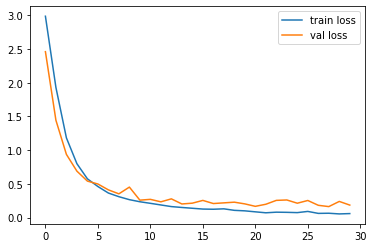

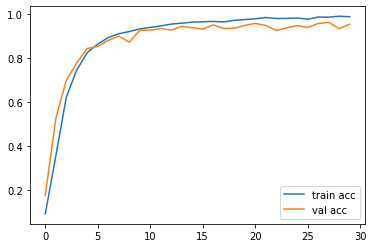

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
pred = model.predict(val_generator)
pred


68/68 [==============================] - 5s 74ms/step


array([[9.9999994e-01, 1.1362860e-31, 2.1188785e-11, ..., 6.8257918e-21,
        1.3494433e-26, 1.1998667e-27],
       [9.9999994e-01, 1.2299101e-27, 1.5600596e-13, ..., 2.6914887e-20,
        2.3797007e-28, 3.9749704e-28],
       [9.9999994e-01, 1.1470753e-28, 2.1444993e-13, ..., 9.7359594e-21,
        1.4455215e-28, 9.9350661e-29],
       ...,
       [1.7115411e-17, 1.2849061e-24, 1.1028467e-18, ..., 2.4598530e-09,
        2.8562978e-14, 9.9999970e-01],
       [1.1306085e-15, 2.3132508e-20, 1.1816209e-17, ..., 3.1391294e-06,
        1.6373071e-14, 9.9994940e-01],
       [4.5000722e-16, 1.4573052e-20, 5.0475763e-16, ..., 3.3245295e-09,
        2.8613164e-11, 9.9983668e-01]], dtype=float32)

#Trying out predict from sci-kit learn

Double checking the accuracy value using the *accuracy_score* function from the $scikit-learn$ library

In [ ]:
from sklearn.metrics import accuracy_score

predicted_label = pred.argmax(axis=-1)

real_label = test_generator.classes

acc = accuracy_score(predicted_label, real_label)

print(round(acc*100,2),"%",sep="")

96.23%


In [ ]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/drive/Shareddrives/Braille_Project/Braille_Project/output/அ/bright_0_2969.jpg')

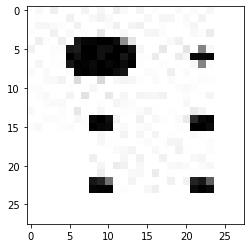

In [ ]:
plt.imshow(img)

In [ ]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [249., 249., 249.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [254., 254., 254.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [247., 247., 247.],
        [247., 247., 247.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(28, 28, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
model.predict(x)

1/1 [==============================] - 0s 96ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(x), axis=1)
a

1/1 [==============================] - 0s 21ms/step


array([1])